In [1]:
from mcbj import *
from pca_and_ml import *
from noise import *
from IPython.display import display, Markdown
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, StrMethodFormatter
import pandas as pd
import re

import plots

date = "22_03_23"
sample_rate = 50_000
# home_folder = Path(f"D:/BJ_Data/{date}")
home_folder = Path(f'//DATACENTER/BreakJunction_group/BJ_Data/{date}')

Principal components calculated for the $0.01-10.01\;\mathrm{G_0}$ range linear histograms

In [2]:
# tracenumbers of traces after the evaporation
after_evap = np.arange(start=36002, stop=56200, step=1)

In [3]:
# calculate histogram
# hist_1G0 = Histogram(folder=home_folder,
#                      traces=after_evap[:8000],  #8000
#                      conductance_range=(0.01, 10.01),
#                      conductance_log_scale=False,
#                      conductance_bins_num=500,
#                      conductance_bins_mode='total')

# hist_1G0.calc_stats(align_at=0.5,
#                 range_pull=(-1, 1),
#                 range_push=(-0.5, 1.5))

# hist_1G0.calc_corr_hist_2d()

# hist_1G0.save_histogram(fname='hist_1G0_500.h5')

|     file name     |  number of bins  |  conductance range  |
|:-----------------:|:----------------:|:-------------------:|
|  hist_1G0_100.h5  |        100       |    (1e-2, 10.01)    |
|  hist_1G0_200.h5  |        200       |    (1e-2, 10.01)    |
|  hist_1G0_500.h5  |        500       |    (1e-2, 10.01)    |

In [4]:
# alternatively, load histogram
hist_1G0 = Histogram(folder=home_folder,
                     load_from='hist_1G0_100.h5')

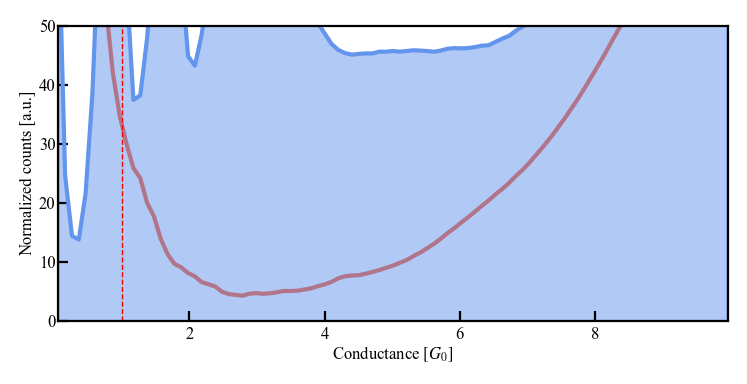

In [5]:
ax = hist_1G0.plot_hist_1d(dpi=200)
ax.set_ylim(0, 50)
ax.axvline(1, ls='--', lw=0.5, c='r')

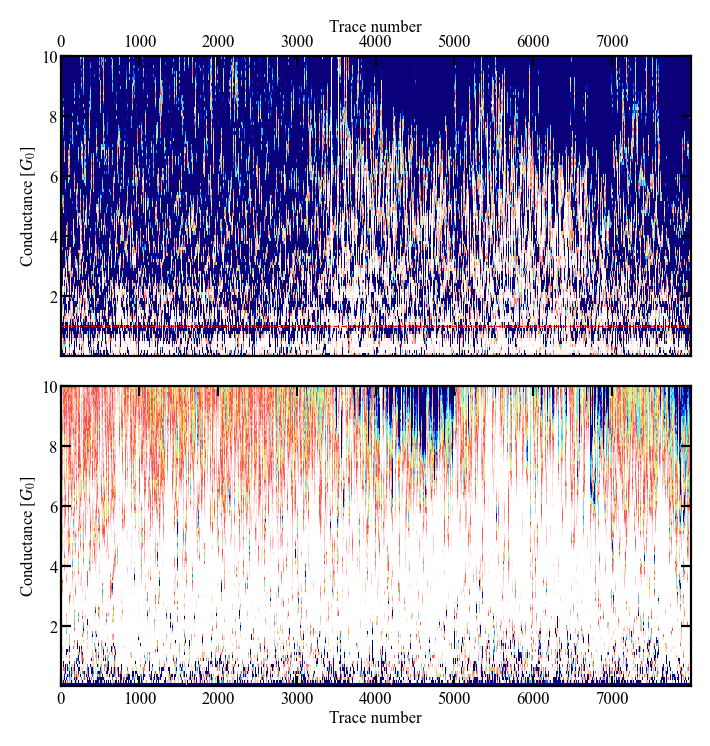

In [6]:
ax_temp_pull, ax_temp_push = hist_1G0.plot_temporal_hist(vmax_pull=30, vmax_push=200, dpi=200)
ax_temp_pull.axhline(1, ls='--', lw=0.5, c='r')

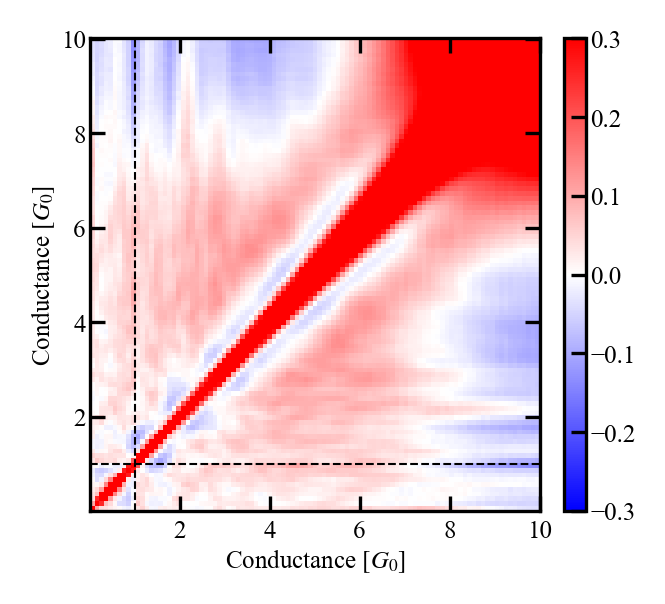

In [7]:
ax_corr, ax_cbar = hist_1G0.plot_corr(mode='pull', dpi=300, vmin=-0.3, vmax=0.3)
ax_corr.axhline(1, ls='--', lw=0.5, c='k')
ax_corr.axvline(1, ls='--', lw=0.5, c='k')

In [8]:
pc = PCA(hist=hist_1G0, num_of_pcs=5)
pc.calc_principal_components(direction='pull')

pc.project_to_pcs()
pc.calc_pc_hist_all(num_of_bins=100, hist_min=None, hist_max = None)
pc.select_percentage(percentage=20, calc_histograms=True)

Calculating the projections to PCs.:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [9]:
pc.calc_group_histograms()

Calculating 1D and 2D histograms of PC1 group1.


  0%|          | 0/1600 [00:00<?, ?it/s]

  0%|          | 0/1600 [00:00<?, ?it/s]

2D histogram pull direction created from 1600 traces
2D histogram push direction created from 1600 traces
Calculating 1D and 2D histograms of PC1 group2.


  0%|          | 0/1600 [00:00<?, ?it/s]

  0%|          | 0/1600 [00:00<?, ?it/s]

2D histogram pull direction created from 1600 traces
2D histogram push direction created from 1600 traces
Calculating 1D and 2D histograms of PC2 group1.


  0%|          | 0/1600 [00:00<?, ?it/s]

  0%|          | 0/1600 [00:00<?, ?it/s]

2D histogram pull direction created from 1600 traces
2D histogram push direction created from 1600 traces
Calculating 1D and 2D histograms of PC2 group2.


  0%|          | 0/1600 [00:00<?, ?it/s]

  0%|          | 0/1600 [00:00<?, ?it/s]

2D histogram pull direction created from 1600 traces
2D histogram push direction created from 1600 traces
Calculating 1D and 2D histograms of PC3 group1.


  0%|          | 0/1600 [00:00<?, ?it/s]

  0%|          | 0/1600 [00:00<?, ?it/s]

2D histogram pull direction created from 1600 traces
2D histogram push direction created from 1600 traces
Calculating 1D and 2D histograms of PC3 group2.


  0%|          | 0/1600 [00:00<?, ?it/s]

  0%|          | 0/1600 [00:00<?, ?it/s]

2D histogram pull direction created from 1600 traces
2D histogram push direction created from 1600 traces
Calculating 1D and 2D histograms of PC4 group1.


  0%|          | 0/1600 [00:00<?, ?it/s]

  0%|          | 0/1600 [00:00<?, ?it/s]

2D histogram pull direction created from 1600 traces
2D histogram push direction created from 1600 traces
Calculating 1D and 2D histograms of PC4 group2.


  0%|          | 0/1600 [00:00<?, ?it/s]

  0%|          | 0/1600 [00:00<?, ?it/s]

2D histogram pull direction created from 1600 traces
2D histogram push direction created from 1600 traces
Calculating 1D and 2D histograms of PC5 group1.


  0%|          | 0/1600 [00:00<?, ?it/s]

  0%|          | 0/1600 [00:00<?, ?it/s]

2D histogram pull direction created from 1600 traces
2D histogram push direction created from 1600 traces
Calculating 1D and 2D histograms of PC5 group2.


  0%|          | 0/1600 [00:00<?, ?it/s]

  0%|          | 0/1600 [00:00<?, ?it/s]

2D histogram pull direction created from 1600 traces
2D histogram push direction created from 1600 traces


In [10]:
pc.save_principal_components(fname='pc_100_linear_hist.h5', save_trace_hists=True)

Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\22_03_23\results\histograms\hist_1d_total_for_pc_100_linear_hist.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\22_03_23\results\histograms\hist_1d_group1_for_pc_100_linear_hist_PC1.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\22_03_23\results\histograms\hist_1d_group2_for_pc_100_linear_hist_PC1.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\22_03_23\results\histograms\hist_1d_group1_for_pc_100_linear_hist_PC2.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\22_03_23\results\histograms\hist_1d_group2_for_pc_100_linear_hist_PC2.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\22_03_23\results\histograms\hist_1d_group1_for_pc_100_linear_hist_PC3.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\22_03_23\results\histograms\hist_1d_group2_for_pc_100_linear_hist_PC3.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\22_03_2

In [ ]:
pc.plot_group_histograms_1d(ylims=(0, 300))

In [ ]:
pc.calc_group_histograms(conductance_range=(1e-5, 10),
                         conductance_log_scale=True,
                         conductance_bins_num=100,
                         conductance_bins_mode='total')

In [ ]:
pc.save_principal_components(fname='pc_100_log_hist.h5', save_trace_hists=True)

array([<AxesSubplot:title={'center':'PC1'}>,
       <AxesSubplot:title={'center':'PC2'}>,
       <AxesSubplot:title={'center':'PC3'}>,
       <AxesSubplot:title={'center':'PC4'}>,
       <AxesSubplot:title={'center':'PC5'}>], dtype=object)

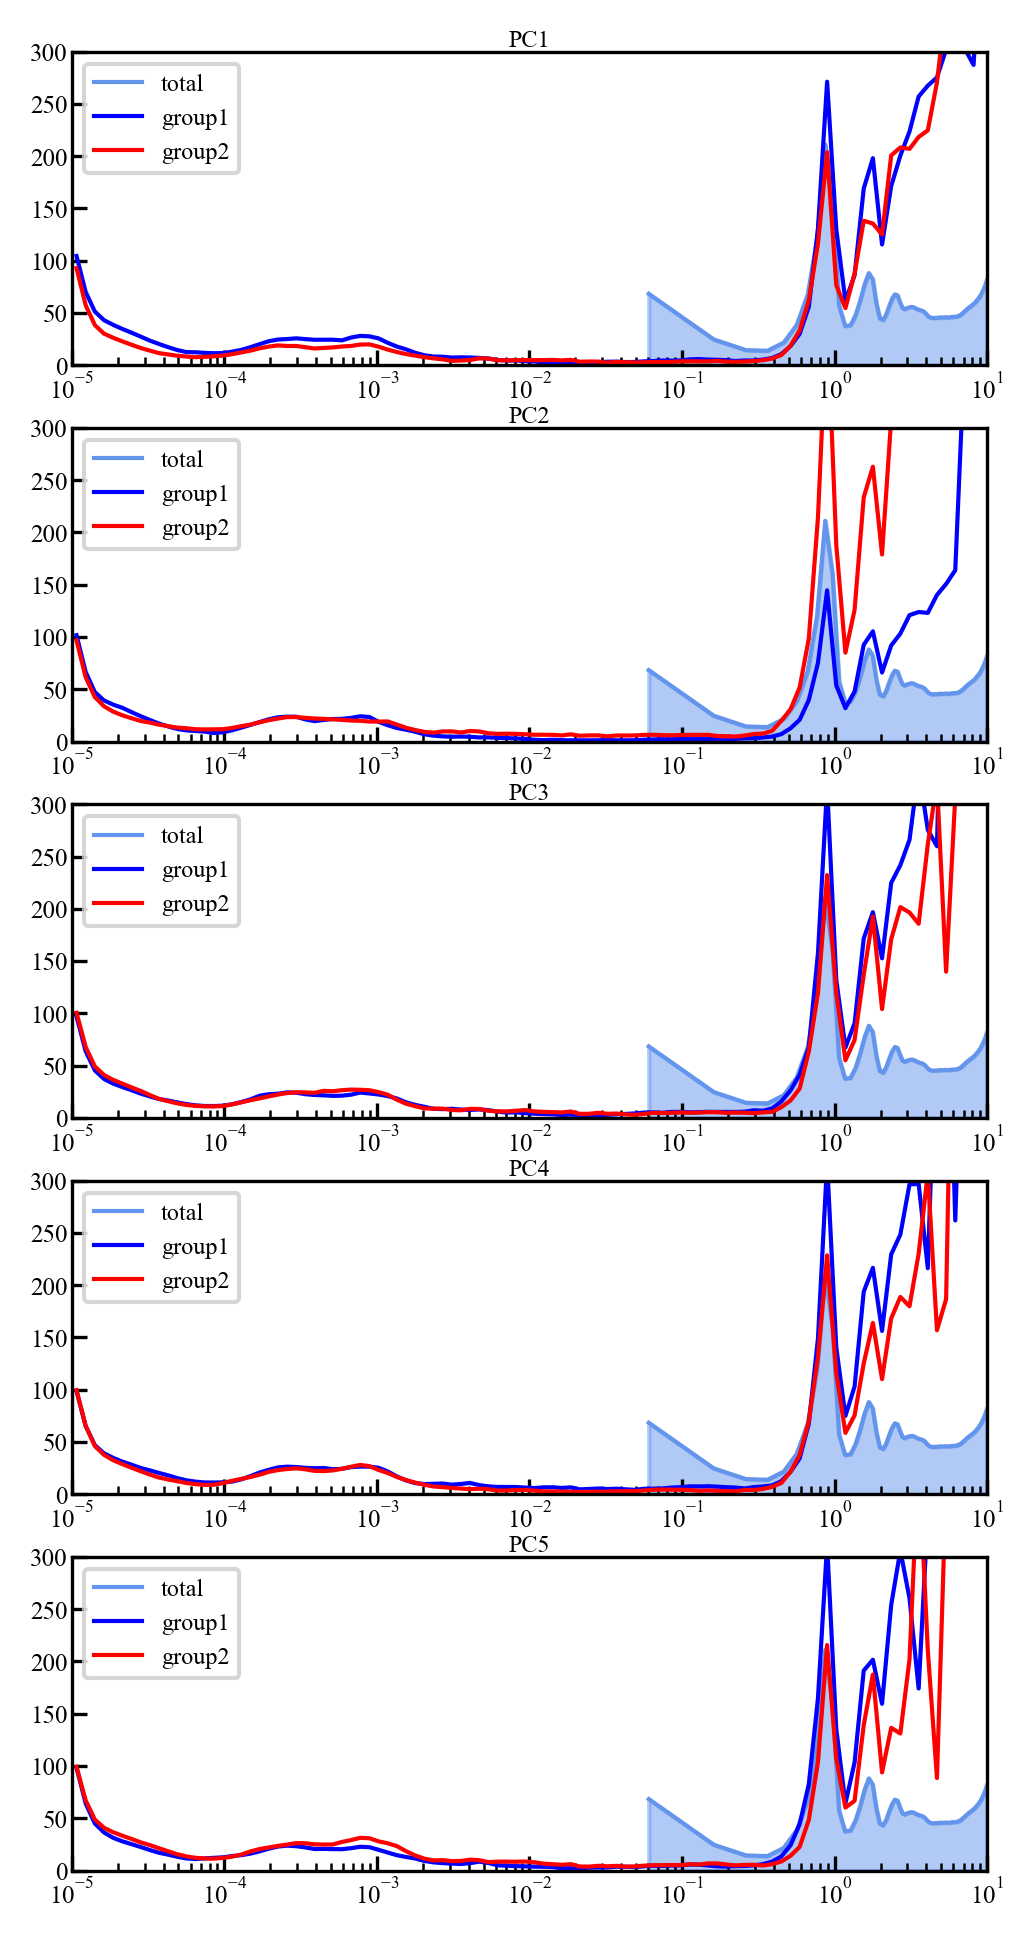

In [11]:
pc.plot_group_histograms_1d(ylims=(0, 300))

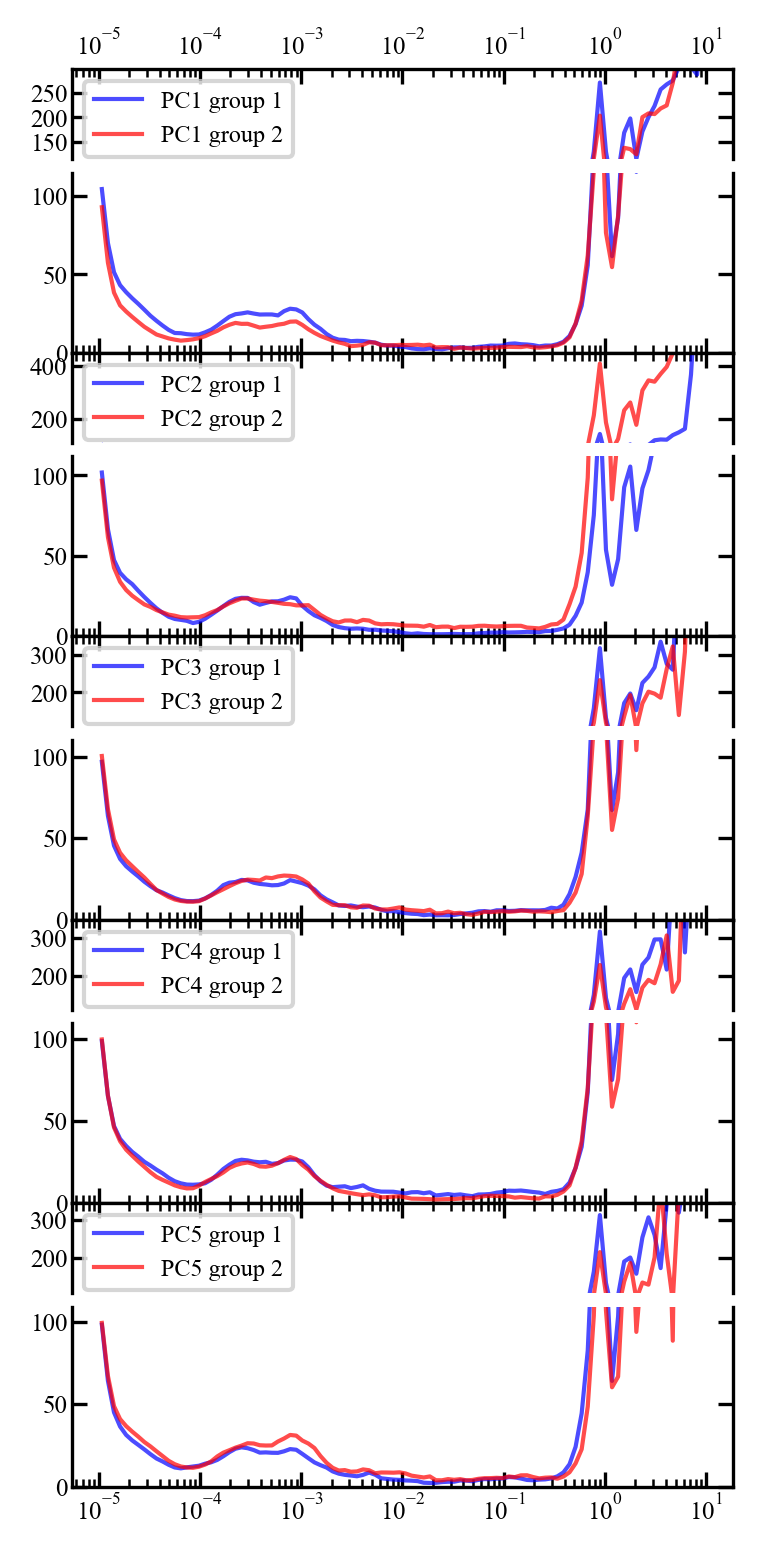

In [12]:
num_of_pcs = pc.num_of_pcs

fig = plt.figure(figsize=utils.cm2inch(7, 3 * num_of_pcs), dpi=300)  # figsize: (width, height) in inches

gs_total = gridspec.GridSpec(nrows=num_of_pcs, ncols=1, height_ratios=(1,)*num_of_pcs,
                             figure=fig, left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.1, hspace=0)

gs_subs = []
ax_top = []
ax_bottom = []
for i in range(num_of_pcs):
    gs_subs.append(gridspec.GridSpecFromSubplotSpec(nrows=2, ncols=1, height_ratios=(1, 2),
                                                    subplot_spec=gs_total[i],
                                                    wspace=0.25, hspace=0.1))
    
    ax_top.append(fig.add_subplot(gs_subs[i][0]))
    ax_bottom.append(fig.add_subplot(gs_subs[i][1]))
    
    ax_top[i].spines.bottom.set_visible(False)
    ax_top[i].xaxis.set_label_position('top')
    ax_top[i].xaxis.tick_top()
    
    ax_top[i].yaxis.set_ticks_position('both')
    ax_bottom[i].yaxis.set_ticks_position('both')
    
    ax_bottom[i].spines.top.set_visible(False)
    
    ax_top[i].set_xscale('log')
    ax_bottom[i].set_xscale('log')
    
    hist_bins_1 = pc.hist_group1[pc.pc_keys[i]].hist_1d_bins
    hist_1d_pull_1 = pc.hist_group1[pc.pc_keys[i]].hist_1d_pull
    hist_bins_2 = pc.hist_group2[pc.pc_keys[i]].hist_1d_bins
    hist_1d_pull_2 = pc.hist_group2[pc.pc_keys[i]].hist_1d_pull
    
    group1_max_bottom = max(hist_1d_pull_1[np.bitwise_and(hist_bins_1 > 1e-5, hist_bins_1 < 0.1)])
    group2_max_bottom = max(hist_1d_pull_2[np.bitwise_and(hist_bins_2 > 1e-5, hist_bins_2 < 0.1)])
    
    group1_max_top = max(hist_1d_pull_1[np.bitwise_and(hist_bins_1 > 0.1, hist_bins_1 < 2)])
    group2_max_top = max(hist_1d_pull_2[np.bitwise_and(hist_bins_2 > 0.1, hist_bins_2 < 2)])
    
    ax_bottom[i].set_ylim(0, 1.1*max(group1_max_bottom, group2_max_bottom))
    ax_top[i].set_ylim(1.1*max(group1_max_bottom, group2_max_bottom),
                       1.1*max(group1_max_top, group2_max_top))
    
    ax_top[i].plot(hist_bins_1, hist_1d_pull_1, c='b', lw=1, alpha=0.7, label=f'{pc.pc_keys[i]} group 1')
    ax_bottom[i].plot(hist_bins_1, hist_1d_pull_1, c='b', lw=1, alpha=0.7)
    ax_top[i].plot(hist_bins_2, hist_1d_pull_2, c='r', lw=1, alpha=0.7, label=f'{pc.pc_keys[i]} group 2')
    ax_bottom[i].plot(hist_bins_2, hist_1d_pull_2, c='r', lw=1, alpha=0.7)
    
    ax_top[i].legend(fontsize='xx-small')
    
    if i != 0:
        ax_top[i].set_xticklabels([])
    if i != num_of_pcs-1:
        ax_bottom[i].set_xticklabels([])
    # ax_top[i].plot(np.arange(0, 10, 1), np.arange(0, 10, 1))

(0.01, 10.01)

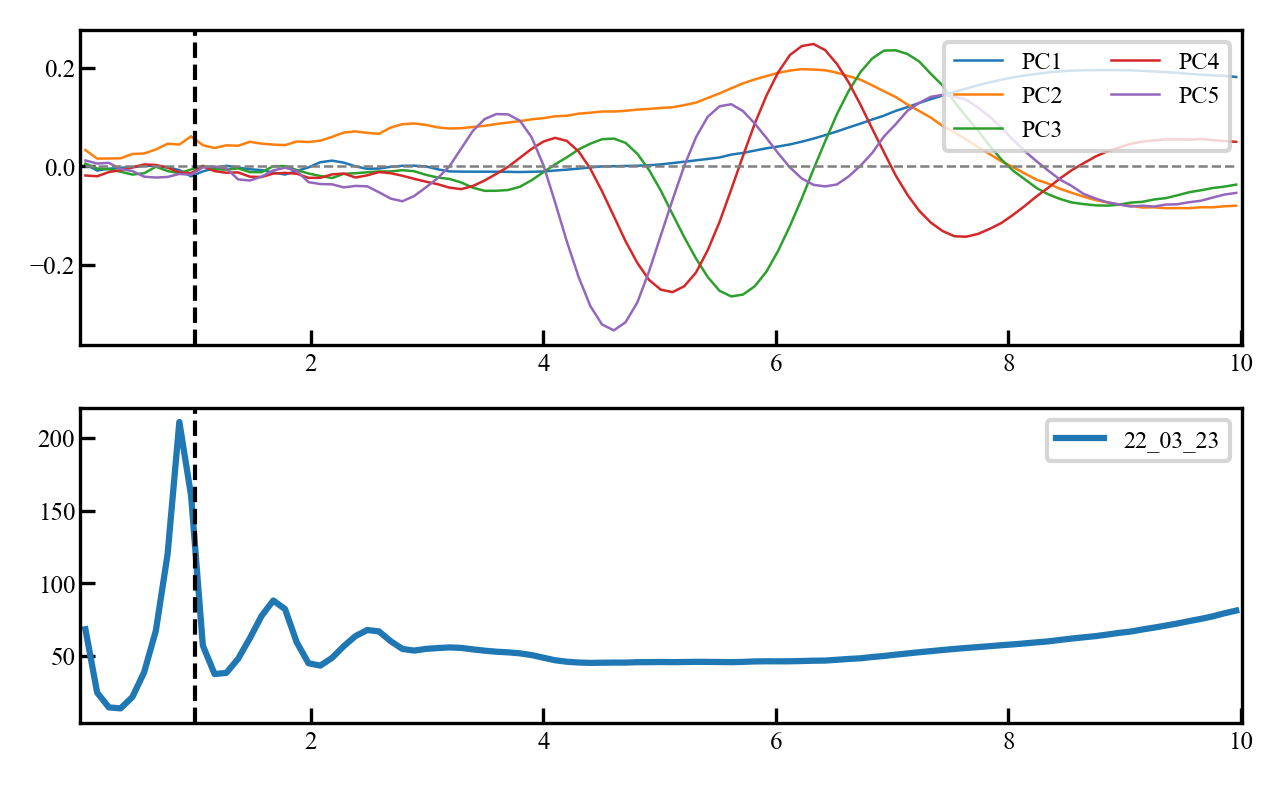

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=2, dpi=300, figsize=(5, 3))
ax1 = pc.plot_pcs(ax=ax1)
ax1.set_xscale('linear')
ax2.plot(hist_1G0.hist_1d_bins, hist_1G0.hist_1d_pull, label='22_03_23')
ax1.axvline(1, ls='--', lw=1, c='k')
ax2.axvline(1, ls='--', lw=1, c='k')
ax2.legend(fontsize='xx-small')
ax1.set_xlim(0.01, 10.01)
ax2.set_xlim(0.01, 10.01)

|     file name     |   histogram used    | align_at (G0) |  skip_points  | win_size |  step_size  | tolerance |  freq_range  | 
|:-----------------:|:-------------------:|:-------------:|:-------------:|:--------:|:-----------:|:---------:|:------------:| 
|  noise_data_1.h5  |   hist_1G0_100.h5   |      2e-2     |       50      |    256   |      64     |     2     | (2000, 5000) | 


In [83]:
with h5py.File(home_folder.joinpath('results/noise/noise_data_1.h5'), 'w') as f:
    for pc_key in pc.pc_keys:
    # pc_key='PC2'
        pc_group = f.create_group(name=pc_key)
        group1_group = pc_group.create_group(name='group1')
        group2_group = pc_group.create_group(name='group2')
        for trace in tqdm(pc.traces_group1[pc_key], desc=f'Noise analysis of traces {pc_key} group 1'):
            trace_pair = TracePair(trace, load_from=home_folder)
            conductance, piezo, psd_intervals, psd_results, fft_freqs, avg_conductance_in_win, areas = \
                temporal_noise_single_trace(trace_pair=trace_pair, align_at=2e-2, interpolate=False,
                    win_size=256, step_size=None, skip_points=50, end_point=3000,
                    tolerance=2, filter_method='start-end', freq_range=(2000, 5000))

            trace_group = group1_group.create_group(name=f'trace_{trace}')

            trace_group.create_dataset(name='conductance', data=conductance)
            trace_group.create_dataset(name='piezo', data=piezo)
            trace_group.create_dataset(name='psd_intervals', data=psd_intervals)
            trace_group.create_dataset(name='psd_results', data=psd_results)
            trace_group.create_dataset(name='fft_freqs', data=fft_freqs)
            trace_group.create_dataset(name='areas', data=areas)
            trace_group.create_dataset(name='avg_conductance_in_win', data=avg_conductance_in_win)

        for trace in tqdm(pc.traces_group2[pc_key], desc=f'Noise analysis of traces {pc_key} group 2'):
            trace_pair = TracePair(trace, load_from=home_folder)
            conductance, piezo, psd_intervals, psd_results, fft_freqs, avg_conductance_in_win, areas = \
                temporal_noise_single_trace(trace_pair=trace_pair, align_at=2e-2, interpolate=False,
                    win_size=256, step_size=None, skip_points=50, end_point=3000,
                    tolerance=2, filter_method='start-end', freq_range=(2000, 5000))

            trace_group = group2_group.create_group(name=f'trace_{trace}')

            trace_group.create_dataset(name='conductance', data=conductance)
            trace_group.create_dataset(name='piezo', data=piezo)
            trace_group.create_dataset(name='psd_intervals', data=psd_intervals)
            trace_group.create_dataset(name='psd_results', data=psd_results)
            trace_group.create_dataset(name='fft_freqs', data=fft_freqs)
            trace_group.create_dataset(name='areas', data=areas)
            trace_group.create_dataset(name='avg_conductance_in_win', data=avg_conductance_in_win)

Noise analysis of traces PC1 group 1:   0%|          | 0/1600 [00:00<?, ?it/s]

Noise analysis of traces PC1 group 2:   0%|          | 0/1600 [00:00<?, ?it/s]

Noise analysis of traces PC2 group 1:   0%|          | 0/1600 [00:00<?, ?it/s]

Noise analysis of traces PC2 group 2:   0%|          | 0/1600 [00:00<?, ?it/s]

Noise analysis of traces PC3 group 1:   0%|          | 0/1600 [00:00<?, ?it/s]

Noise analysis of traces PC3 group 2:   0%|          | 0/1600 [00:00<?, ?it/s]

Noise analysis of traces PC4 group 1:   0%|          | 0/1600 [00:00<?, ?it/s]

Noise analysis of traces PC4 group 2:   0%|          | 0/1600 [00:00<?, ?it/s]

Noise analysis of traces PC5 group 1:   0%|          | 0/1600 [00:00<?, ?it/s]

Noise analysis of traces PC5 group 2:   0%|          | 0/1600 [00:00<?, ?it/s]

In [8]:
pc_key ='PC2'
trace_ind = np.random.randint(0, 1600)

with h5py.File(home_folder.joinpath('results/noise/noise_data_1.h5'), 'r') as f:
    trace = re.search(r'_(\d*)', list(f[f'{pc_key}/group1'].keys())[trace_ind])[1]
    print(trace)
    
    trace_pair_1=TracePair(trace, load_from=home_folder)
    conductance_1 = f[f'{pc_key}/group1/trace_{trace}/conductance'][:]
    piezo_1 = f[f'{pc_key}/group1/trace_{trace}/piezo'][:]
    psd_intervals_1 = f[f'{pc_key}/group1/trace_{trace}/psd_intervals'][:]
    psd_results_1 = f[f'{pc_key}/group1/trace_{trace}/psd_results'][:]
    fft_freqs_1 = f[f'{pc_key}/group1/trace_{trace}/fft_freqs'][:]
    areas_1 = f[f'{pc_key}/group1/trace_{trace}/areas'][:]
    avg_conductance_in_win_1 = f[f'{pc_key}/group1/trace_{trace}/avg_conductance_in_win'][:]
    
    trace = re.search(r'_(\d*)', list(f[f'{pc_key}/group2'].keys())[trace_ind])[1]
    print(trace)
    
    trace_pair_2=TracePair(trace, load_from=home_folder)
    conductance_2 = f[f'{pc_key}/group2/trace_{trace}/conductance'][:]
    piezo_2 = f[f'{pc_key}/group2/trace_{trace}/piezo'][:]
    psd_intervals_2 = f[f'{pc_key}/group2/trace_{trace}/psd_intervals'][:]
    psd_results_2 = f[f'{pc_key}/group2/trace_{trace}/psd_results'][:]
    fft_freqs_2 = f[f'{pc_key}/group2/trace_{trace}/fft_freqs'][:]
    areas_2 = f[f'{pc_key}/group2/trace_{trace}/areas'][:]
    avg_conductance_in_win_2 = f[f'{pc_key}/group2/trace_{trace}/avg_conductance_in_win'][:]

39430
36113


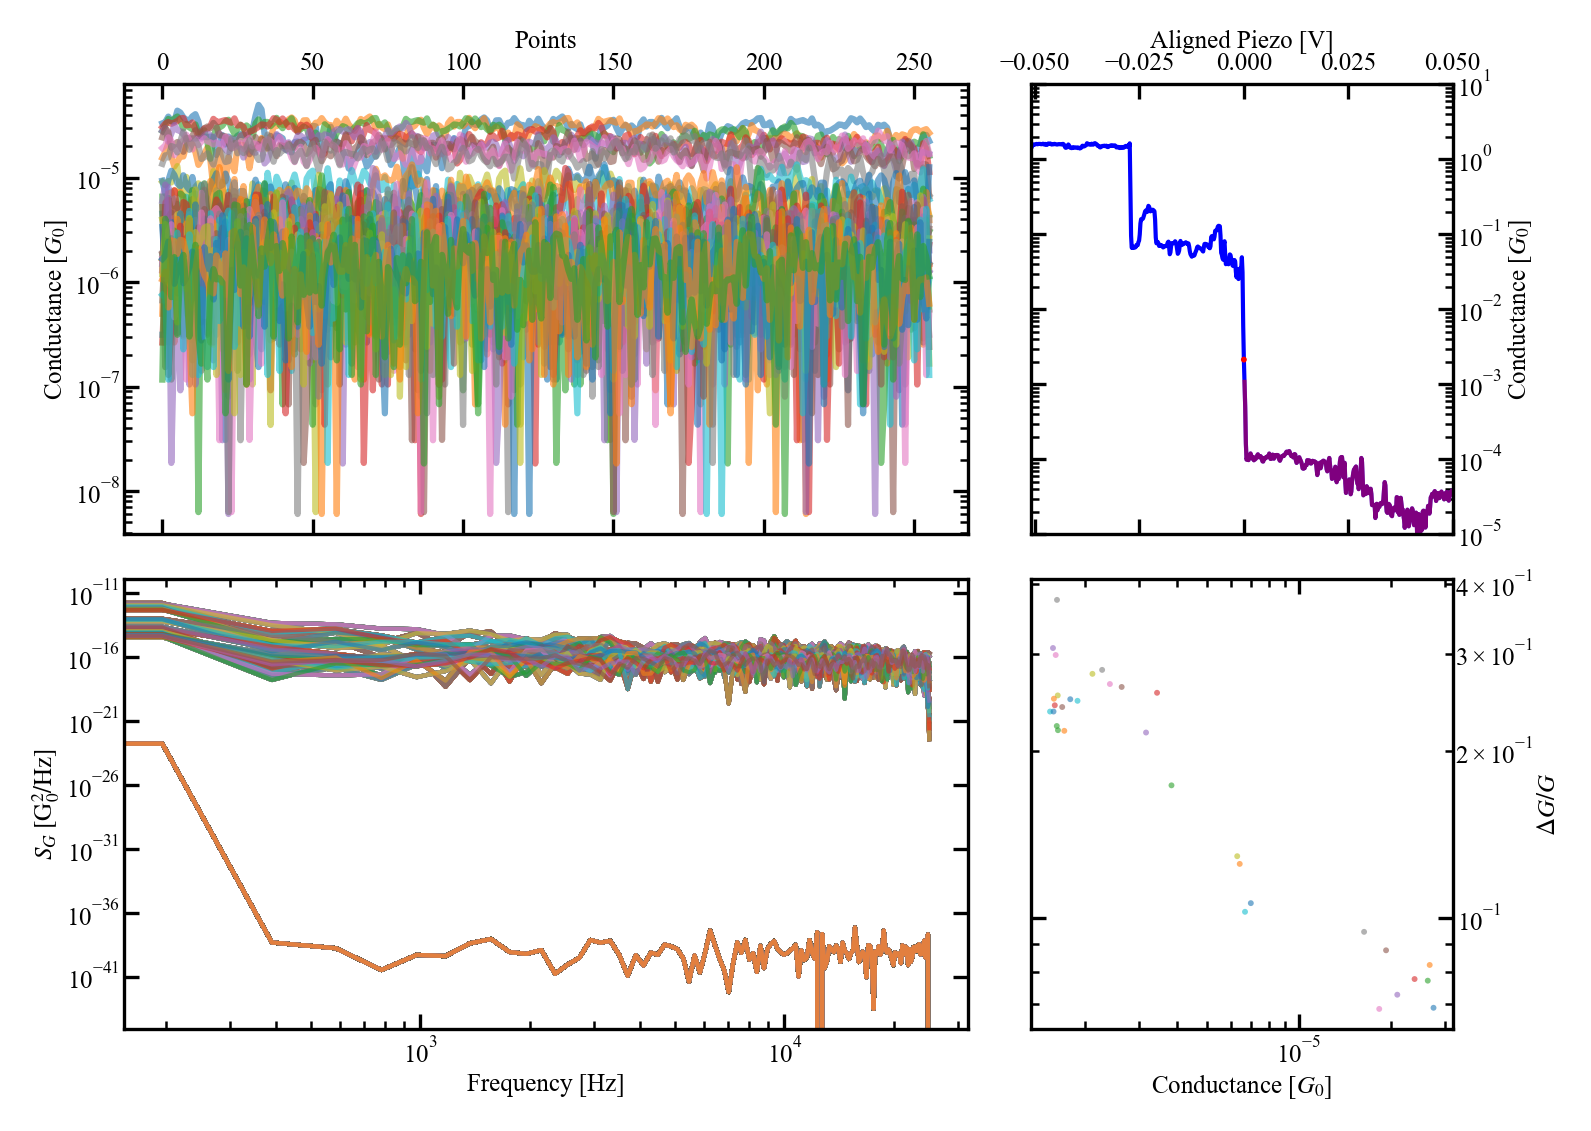

In [23]:
trace_pair_1.align_trace(align_at=2e-2, interpolate=False)
ax_interval, ax_trace, ax_pasd, ax_noise = plot_temporal_noise_single_trace(trace_pair=trace_pair_1,
                                                                             psd_intervals=psd_intervals_1,
                                                                             fft_freqs=fft_freqs_1,
                                                                             psd_results=psd_results_1,
                                                                             avg_conductance_in_win=avg_conductance_in_win_1,
                                                                             areas=areas_1,
                                                                             noise_type='dG/G')
ax_trace.set_ylim(1e-5, 10)
# ax_trace.set_xlim(-0.0051, 0.015)
ax_trace.set_xlim(-0.051, 0.05)
ax_trace.plot(piezo_1, conductance_1, lw=1, c='r', alpha=0.5)
ax_trace.scatter(trace_pair_1.aligned_piezo_pull[trace_pair_1.aligned_piezo_pull==0], trace_pair_1.conductance_pull[trace_pair_1.aligned_piezo_pull==0], c='r', marker='o', s=2, edgecolor='None', zorder=20)

(54.78, 54.8)

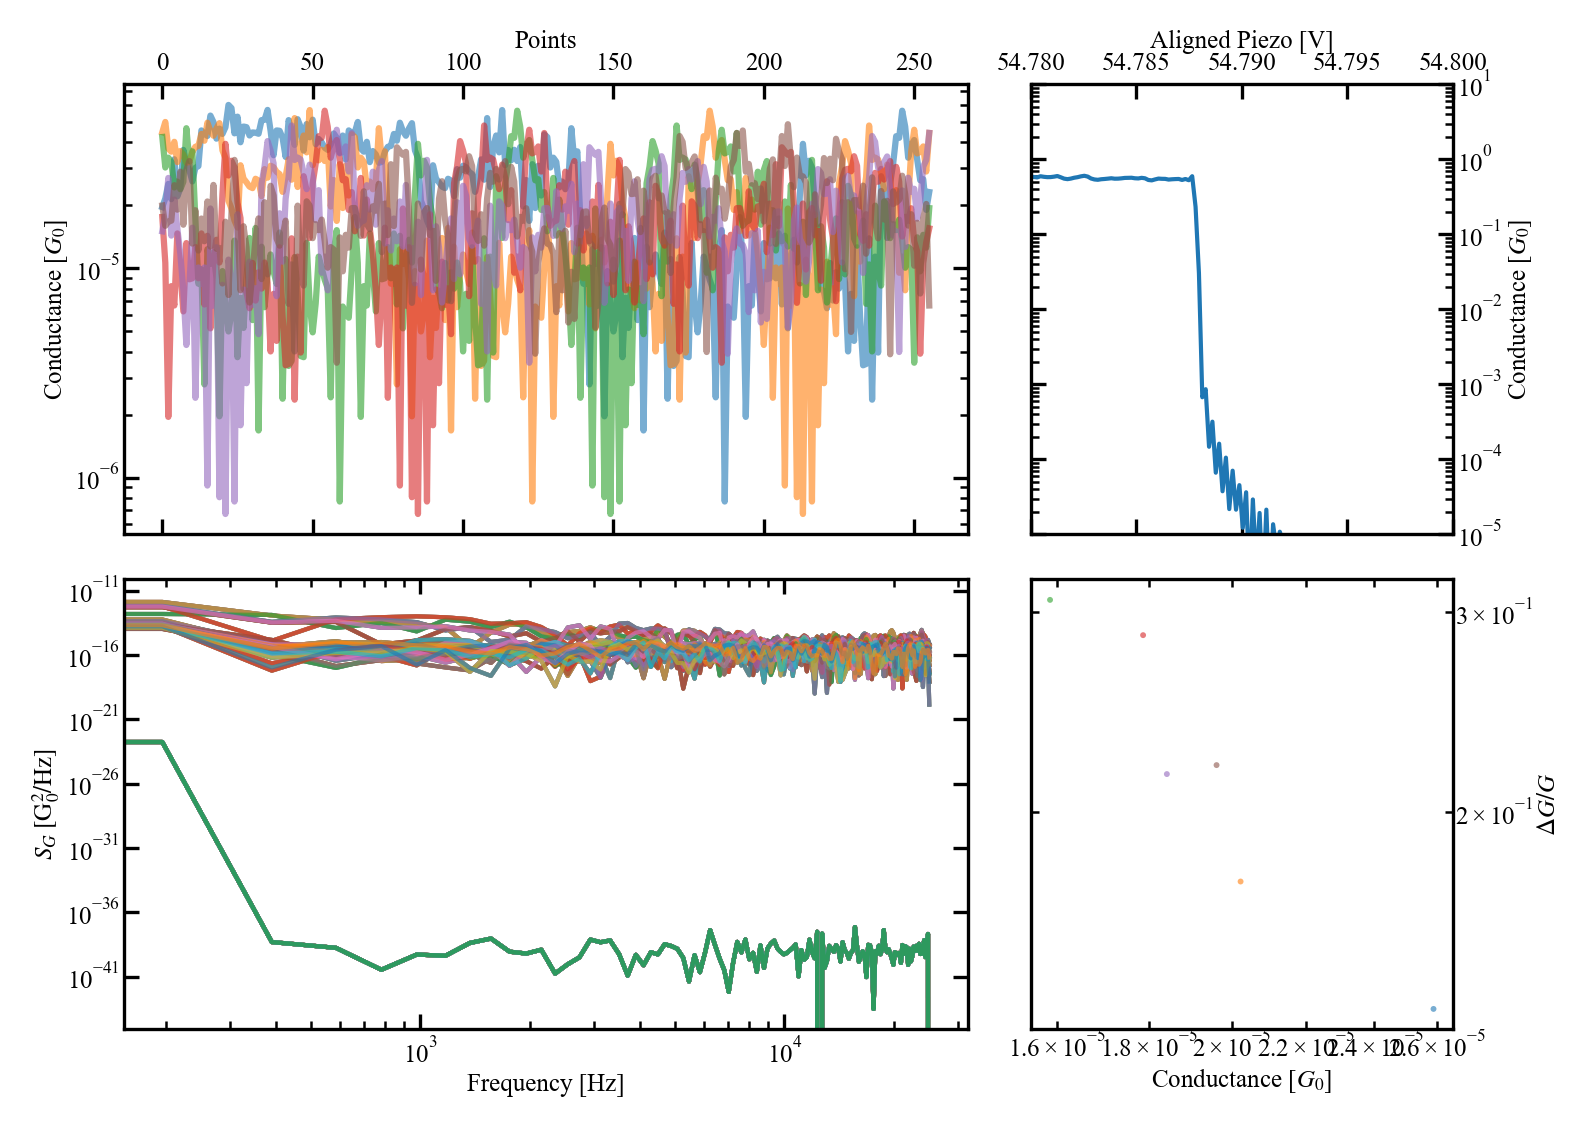

In [25]:
trace_pair_2 = TracePair(43632, load_from=home_folder)
trace_pair_2.align_trace(align_at=2e-2, interpolate=False)
ax_interval, ax_trace, ax_pasd, ax_noise = plot_temporal_noise_single_trace(trace_pair=trace_pair_2,
                                 psd_intervals=psd_intervals_2,
                                 fft_freqs=fft_freqs_2,
                                 psd_results=psd_results_2,
                                 avg_conductance_in_win=avg_conductance_in_win_2,
                                 areas=areas_2,
                                 noise_level_conductance=1e-5,
                                 noise_type='dG/G')

ax_trace.set_ylim(1e-5, 10)
ax_trace.plot(trace_pair_2.piezo_pull, trace_pair_2.conductance_pull, lw=1)
ax_trace.set_xlim(54.78,54.8)

In [59]:
areas_all_1 = []
areas_all_2 = []
cond_avg_all_1 = []
cond_avg_all_2 = []
pc_key='PC2'
for trace_ind in tqdm(range(0, 1600)):
    with h5py.File(home_folder.joinpath('results/noise/noise_data_1.h5'), 'r') as f:
        trace = re.search(r'_(\d*)', list(f[f'{pc_key}/group1'].keys())[trace_ind])[1]
        # print(trace)

        # trace_pair_1=TracePair(trace, load_from=home_folder)
        # conductance_1 = f[f'{pc_key}/group1/trace_{trace}/conductance'][:]
        # piezo_1 = f[f'{pc_key}/group1/trace_{trace}/piezo'][:]
        # psd_intervals_1 = f[f'{pc_key}/group1/trace_{trace}/psd_intervals'][:]
        # psd_results_1 = f[f'{pc_key}/group1/trace_{trace}/psd_results'][:]
        # fft_freqs_1 = f[f'{pc_key}/group1/trace_{trace}/fft_freqs'][:]
        areas_1 = f[f'{pc_key}/group1/trace_{trace}/areas'][:]
        avg_conductance_in_win_1 = f[f'{pc_key}/group1/trace_{trace}/avg_conductance_in_win'][:]
        
        areas_all_1.append(areas_1)
        cond_avg_all_1.append(avg_conductance_in_win_1)
        
        trace = re.search(r'_(\d*)', list(f[f'{pc_key}/group2'].keys())[trace_ind])[1]
        # print(trace)

        # trace_pair_2=TracePair(trace, load_from=home_folder)
        # conductance_2 = f[f'{pc_key}/group2/trace_{trace}/conductance'][:]
        # piezo_2 = f[f'{pc_key}/group2/trace_{trace}/piezo'][:]
        # psd_intervals_2 = f[f'{pc_key}/group2/trace_{trace}/psd_intervals'][:]
        # psd_results_2 = f[f'{pc_key}/group2/trace_{trace}/psd_results'][:]
        # fft_freqs_2 = f[f'{pc_key}/group2/trace_{trace}/fft_freqs'][:]
        areas_2 = f[f'{pc_key}/group2/trace_{trace}/areas'][:]
        avg_conductance_in_win_2 = f[f'{pc_key}/group2/trace_{trace}/avg_conductance_in_win'][:]
        
        areas_all_2.append(areas_2)
        cond_avg_all_2.append(avg_conductance_in_win_2)

  0%|          | 0/1600 [00:00<?, ?it/s]

In [60]:
areas_all_1 = np.array(areas_all_1).flatten()
areas_all_2 = np.array(areas_all_2).flatten()
cond_avg_all_1 = np.array(cond_avg_all_1).flatten()
cond_avg_all_2 = np.array(cond_avg_all_2).flatten()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13508\3699592131.py:2: RuntimeWarning: invalid value encountered in sqrt
  ax[0].scatter(cond_avg_all_1, np.sqrt(areas_all_1)/cond_avg_all_1, s=1, alpha=0.6)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13508\3699592131.py:3: RuntimeWarning: invalid value encountered in sqrt
  ax[1].scatter(cond_avg_all_2, np.sqrt(areas_all_2)/cond_avg_all_2, s=1, alpha=0.6)


(0.007, 1.0)

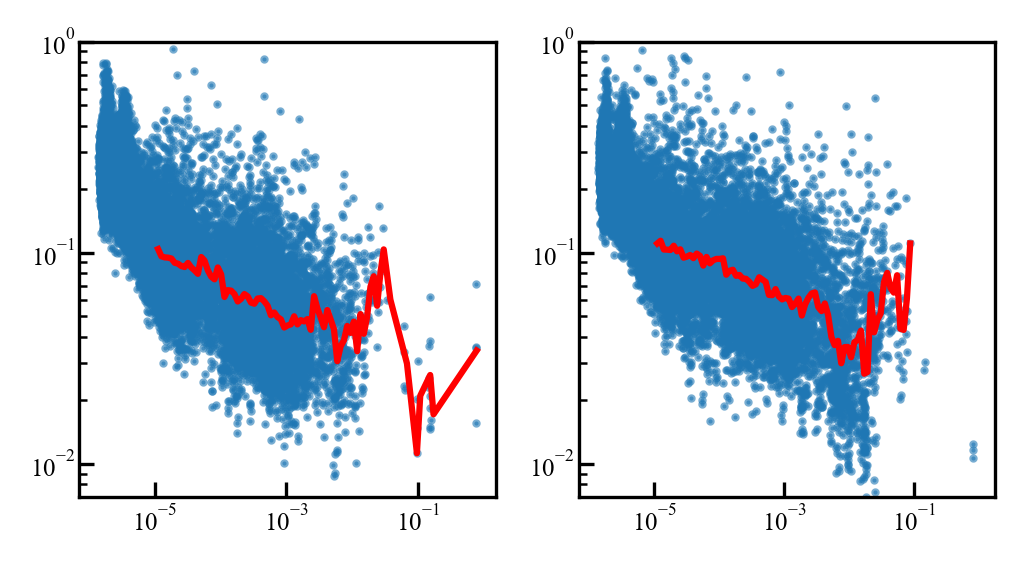

In [82]:
fig, ax = plt.subplots(ncols=2, figsize=utils.cm2inch(10, 5), dpi=300)
ax[0].scatter(cond_avg_all_1, np.sqrt(areas_all_1)/cond_avg_all_1, s=1, alpha=0.6)
ax[1].scatter(cond_avg_all_2, np.sqrt(areas_all_2)/cond_avg_all_2, s=1, alpha=0.6)

ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_yscale('log')

ax[0].plot(xbins_middle[np.bitwise_not(np.isnan(noise_mean_1))], noise_mean_1[np.bitwise_not(np.isnan(noise_mean_1))], c='r')
ax[1].plot(xbins_middle, noise_mean_2, c='r')

ax[0].set_ylim(7e-3, 1e0)
ax[1].set_ylim(7e-3, 1e0)

In [81]:
np.bitwise_not(np.isnan(noise_mean_1))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False, False, False,  True, False, False,  True,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False])

In [76]:
xbins = np.logspace(-5, 0, 100)
xbins_middle = xbins[:-1]+np.diff(xbins)

noise_mean_1 = np.zeros_like(xbins_middle)
areas_mean_1 = np.zeros_like(xbins_middle)
noise_mean_2 = np.zeros_like(xbins_middle)
areas_mean_2 = np.zeros_like(xbins_middle)

for i in range(len(xbins)-1):
    cond_mask_1 = np.bitwise_and(cond_avg_all_1 > xbins[i], cond_avg_all_1 < xbins[i+1])
    cond_mask_2 = np.bitwise_and(cond_avg_all_2 > xbins[i], cond_avg_all_2 < xbins[i+1])
    
    noise_mean_1[i] = utils.log_avg(np.sqrt(areas_all_1[cond_mask_1])/cond_avg_all_1[cond_mask_1])
    noise_mean_2[i] = utils.log_avg(np.sqrt(areas_all_2[cond_mask_2])/cond_avg_all_2[cond_mask_2])
    
    areas_mean_1[i] = utils.log_avg(areas_all_1[cond_mask_1])
    areas_mean_2[i] = utils.log_avg(areas_all_2[cond_mask_2])

D:\mcbj_stmbj\venv\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\mcbj_stmbj\venv\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [77]:
noise_mean_2

array([0.11072648, 0.11409471, 0.10365536, 0.1035377 , 0.10310271,
       0.10806917, 0.10157197, 0.10393265, 0.09482359, 0.09593826,
       0.09763982, 0.09437349, 0.09924281, 0.09671547, 0.08698991,
       0.09558622, 0.08914718, 0.09216238, 0.09358267, 0.09359907,
       0.09422269, 0.07876678, 0.08222705, 0.08316085, 0.07781971,
       0.07860502, 0.07550141, 0.07532126, 0.07292591, 0.06971579,
       0.07095432, 0.07658593, 0.0746968 , 0.07276297, 0.06316925,
       0.06300475, 0.06732953, 0.06212668, 0.06016556, 0.06111674,
       0.06068146, 0.05532549, 0.0574591 , 0.0606985 , 0.05041951,
       0.0569159 , 0.06118564, 0.06420466, 0.06494123, 0.05533218,
       0.05293171, 0.05756576, 0.05063173, 0.03993446, 0.03652247,
       0.03828757, 0.02996892, 0.03575124, 0.03580484, 0.0320011 ,
       0.03772441, 0.03861137, 0.04279204, 0.02673244, 0.02724353,
       0.06366789, 0.04201944, 0.0480612 , 0.05161871, 0.07253469,
       0.0803599 , 0.06808215, 0.06478528, 0.07831327, 0.04368

36581


(-1.0, 1.0)

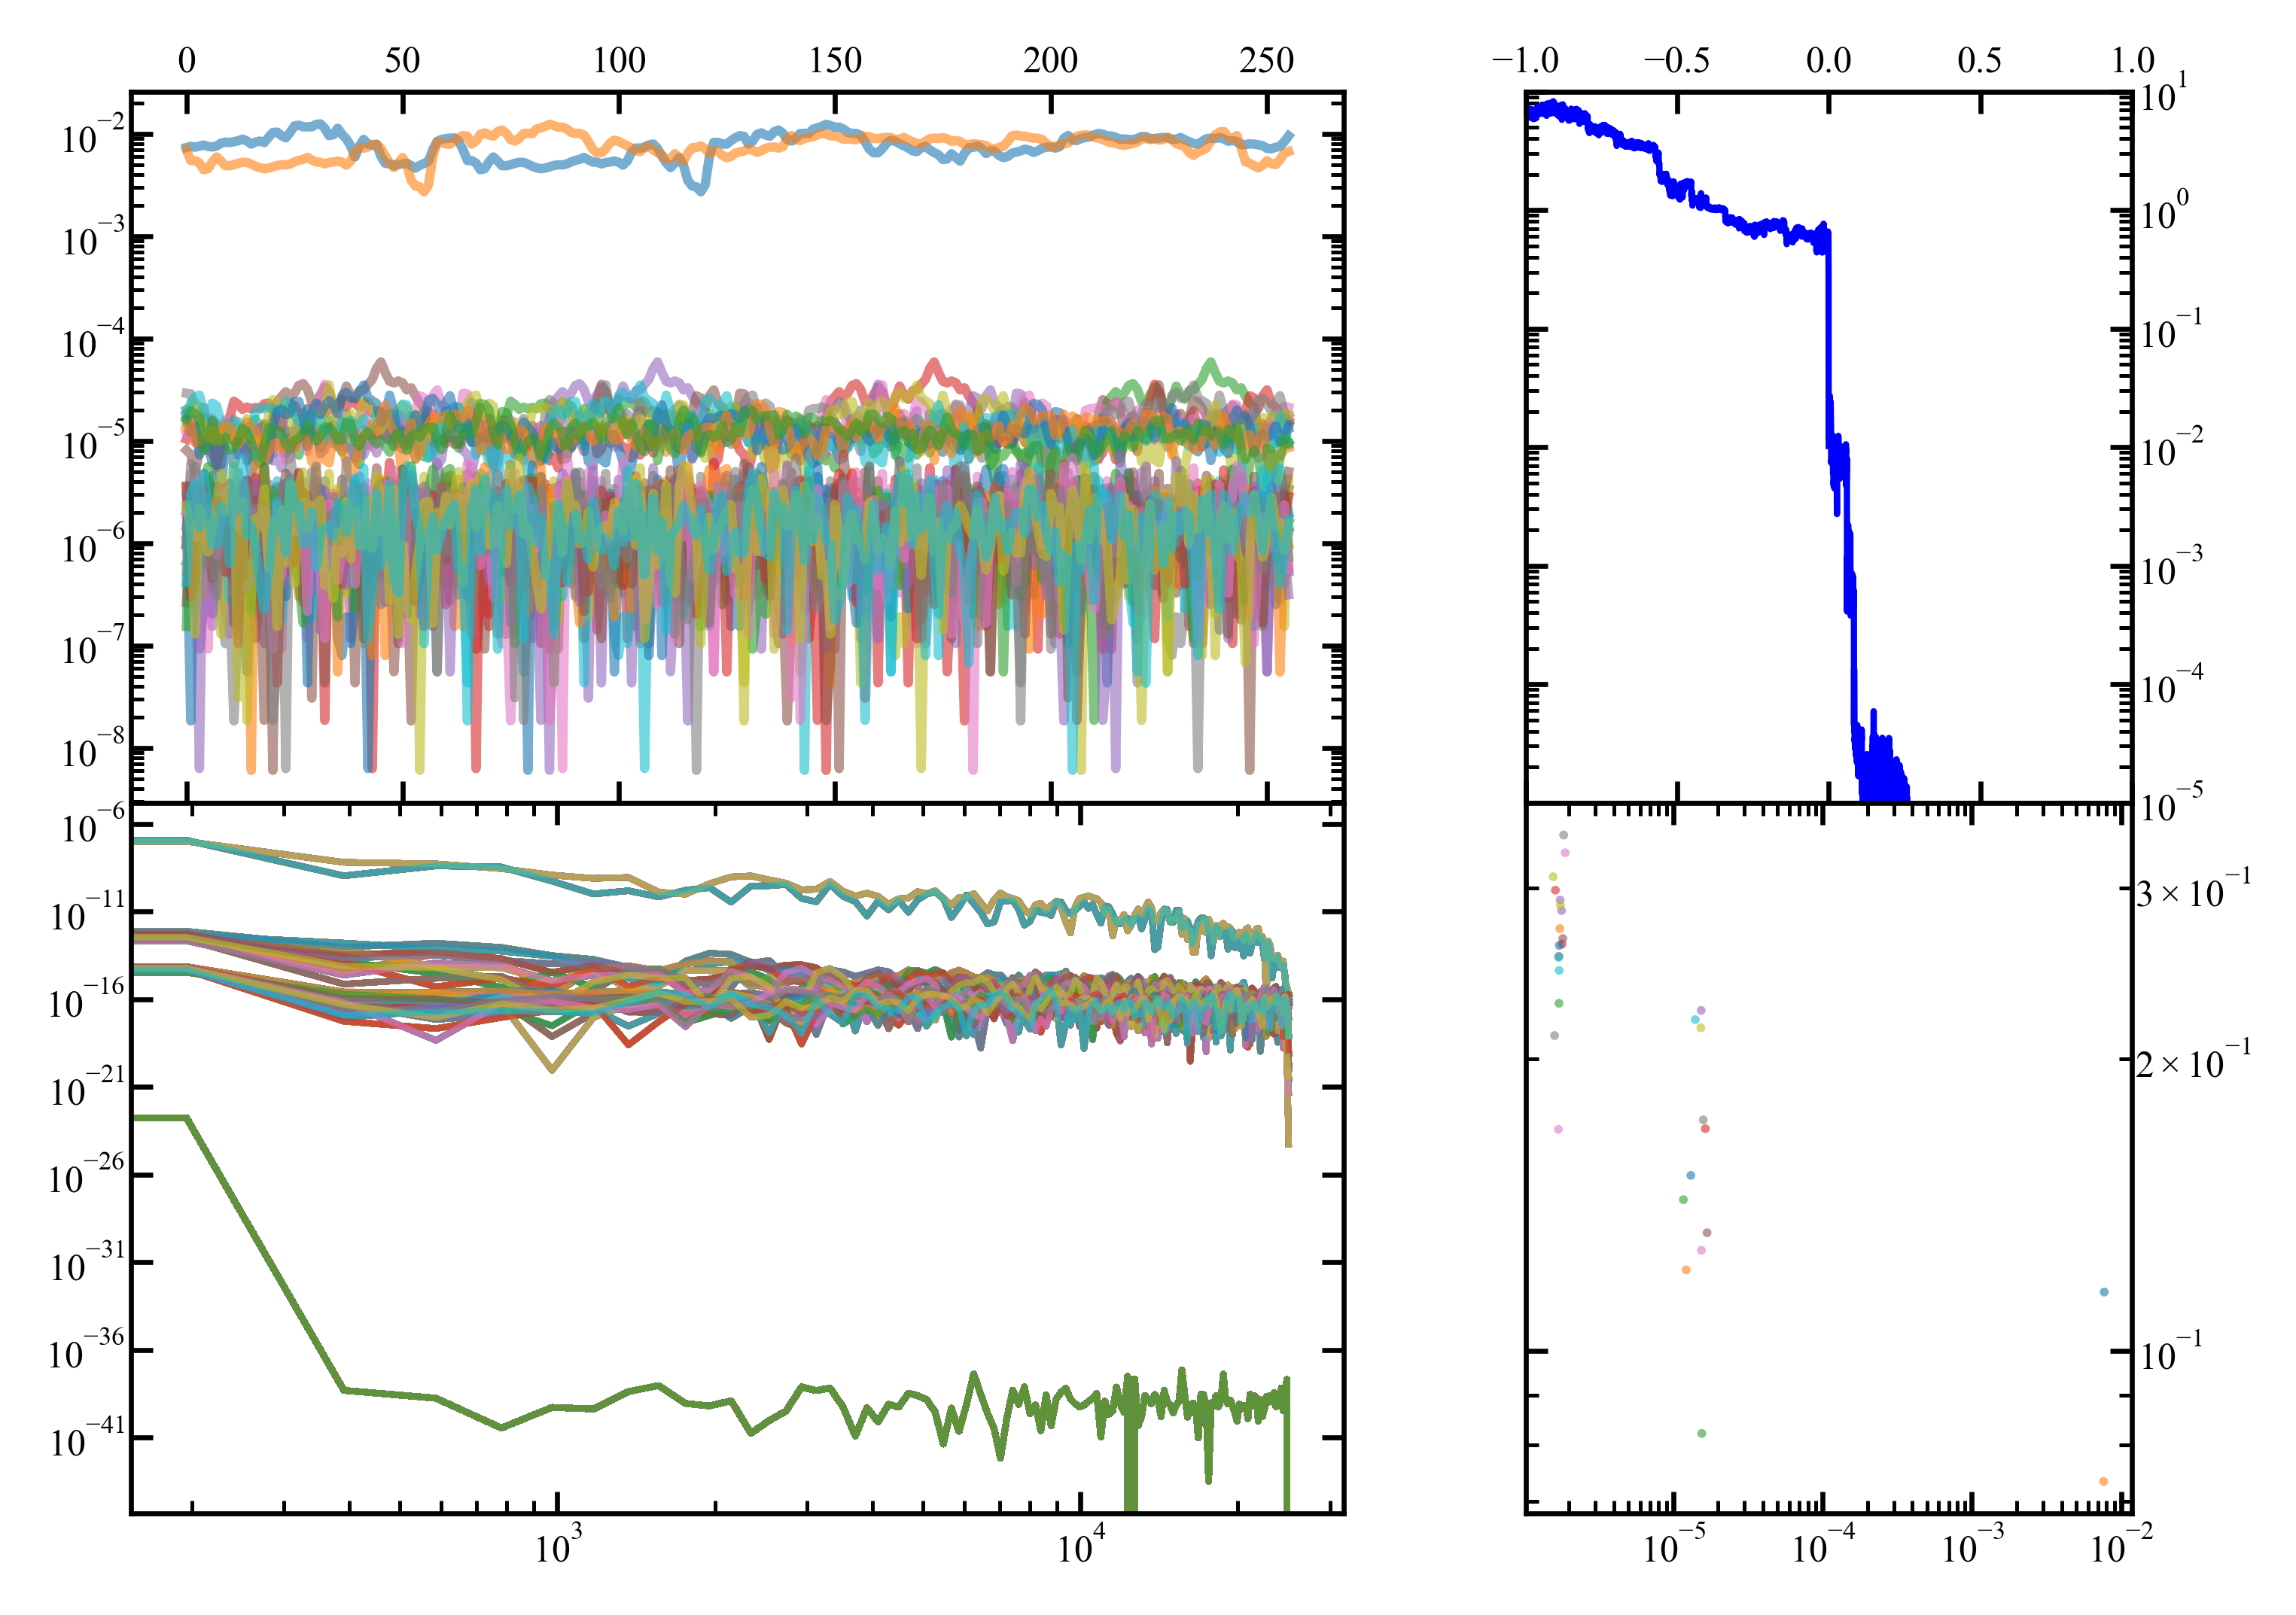

In [62]:
pc_key ='PC2'
trace_ind = np.random.randint(0, 1600)

with h5py.File(home_folder.joinpath('results/noise/noise_data_1.h5'), 'r') as f:
    trace = re.search(r'_(\d*)', list(f[f'{pc_key}/group2'].keys())[trace_ind])[1]
    print(trace)
    
    trace_pair_2=TracePair(trace, load_from=home_folder)
    conductance_2 = f[f'{pc_key}/group2/trace_{trace}/conductance'][:]
    piezo_2 = f[f'{pc_key}/group2/trace_{trace}/piezo'][:]
    psd_intervals_2 = f[f'{pc_key}/group2/trace_{trace}/psd_intervals'][:]
    psd_results_2 = f[f'{pc_key}/group2/trace_{trace}/psd_results'][:]
    fft_freqs_2 = f[f'{pc_key}/group2/trace_{trace}/fft_freqs'][:]
    areas_2 = f[f'{pc_key}/group2/trace_{trace}/areas'][:]
    avg_conductance_in_win_2 = f[f'{pc_key}/group2/trace_{trace}/avg_conductance_in_win'][:]
    
trace_pair_2.align_trace(align_at=2e-2, interpolate=False)
ax_interval, ax_trace, ax_pasd, ax_noise = plot_temporal_noise_single_trace(trace_pair=trace_pair_2,
                                 psd_intervals=psd_intervals_2,
                                 fft_freqs=fft_freqs_2,
                                 psd_results=psd_results_2,
                                 avg_conductance_in_win=avg_conductance_in_win_2,
                                 areas=areas_2,
                                 noise_type='dG/G')

ax_trace.set_ylim(1e-5, 10)
# ax_trace.plot(trace_pair_2.piezo_pull, trace_pair_2.conductance_pull, lw=1)
ax_trace.set_xlim(-1,1)

In [47]:
np.unique(cond_avg_all_2 > 0, return_counts=True)

(array([False,  True]), array([17600, 49600], dtype=int64))

In [48]:
np.unique(cond_avg_all_1 > 0, return_counts=True)

(array([False,  True]), array([13640, 53560], dtype=int64))